In [47]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
#X = chronic_kidney_disease.data.features 
#y = chronic_kidney_disease.data.targets 
df = chronic_kidney_disease.data.original
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [49]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [50]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

# Data Cleaning
First we will clean the data by removing unneeded columns, converting units, recoding class labels, and removing rows with too many missing values.

In [51]:
# keep: age, bp, sg, al, su, bgr, bu, sod, pot, hemo, pcv, wbcc, rbcc, class
# delete: 'ane', 'pe', 'appet', 'cad', 'dm', 'htn', 'pc', 'pcc', 'ba', 'sc', 'rbc'
df.drop(columns=['ane', 'pe', 'appet', 'cad', 'dm', 'htn', 'pc', 'pcc', 'ba', 'sc', 'rbc'], inplace=True)

df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
bgr      float64
bu       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
class     object
dtype: object

In [52]:
# convert hemoglobin from g/dl to g/l
df['hemo'] = df['hemo'] * 10 # run only if hemo is in g/dl
df

In [54]:
# recode class labels as a or c; a for abnormal (chronic kidney disease), c for normal
df['class'] = df['class'].replace({'ckd': 'a', 'notckd': 'c'})

In [55]:
# get rid of rows with 3 or more missing values
original_len = len(df)
df = df[df.isnull().sum(axis=1) < 3]
print(f'Original dataset had {original_len} rows; cleaned dataset has {len(df)} rows.')

Original dataset had 400 rows; cleaned dataset has 265 rows.


# Data Cleaning Complete
Now we can move on to splitting the data into affected and control datasets for final analysis.

In [68]:
# split cleaned dataframe into two separate dataframes based on the class label
df_affected = df[df['class'] == 'a']
df_control = df[df['class'] == 'c']

# Final counts
print(f'Total cleaned dataframe has {len(df)} rows.')
print(f'Affected (ckd) dataframe has {len(df_affected)} rows.')
print(f'Control (notckd) dataframe has {len(df_control)} rows.')

print('\nAffected dataframe')
display(df_affected.head())
print('\nControl dataframe')
display(df_control.head())

Total cleaned dataset has 265 rows.
Affected (ckd) dataset has 126 rows.
Control (notckd) dataset has 139 rows.

Affected dataset preview:


,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a



Control dataset preview:


,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c


In [57]:
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(4, 4, i+1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)

# Plotting initial graphs for the affected dataset

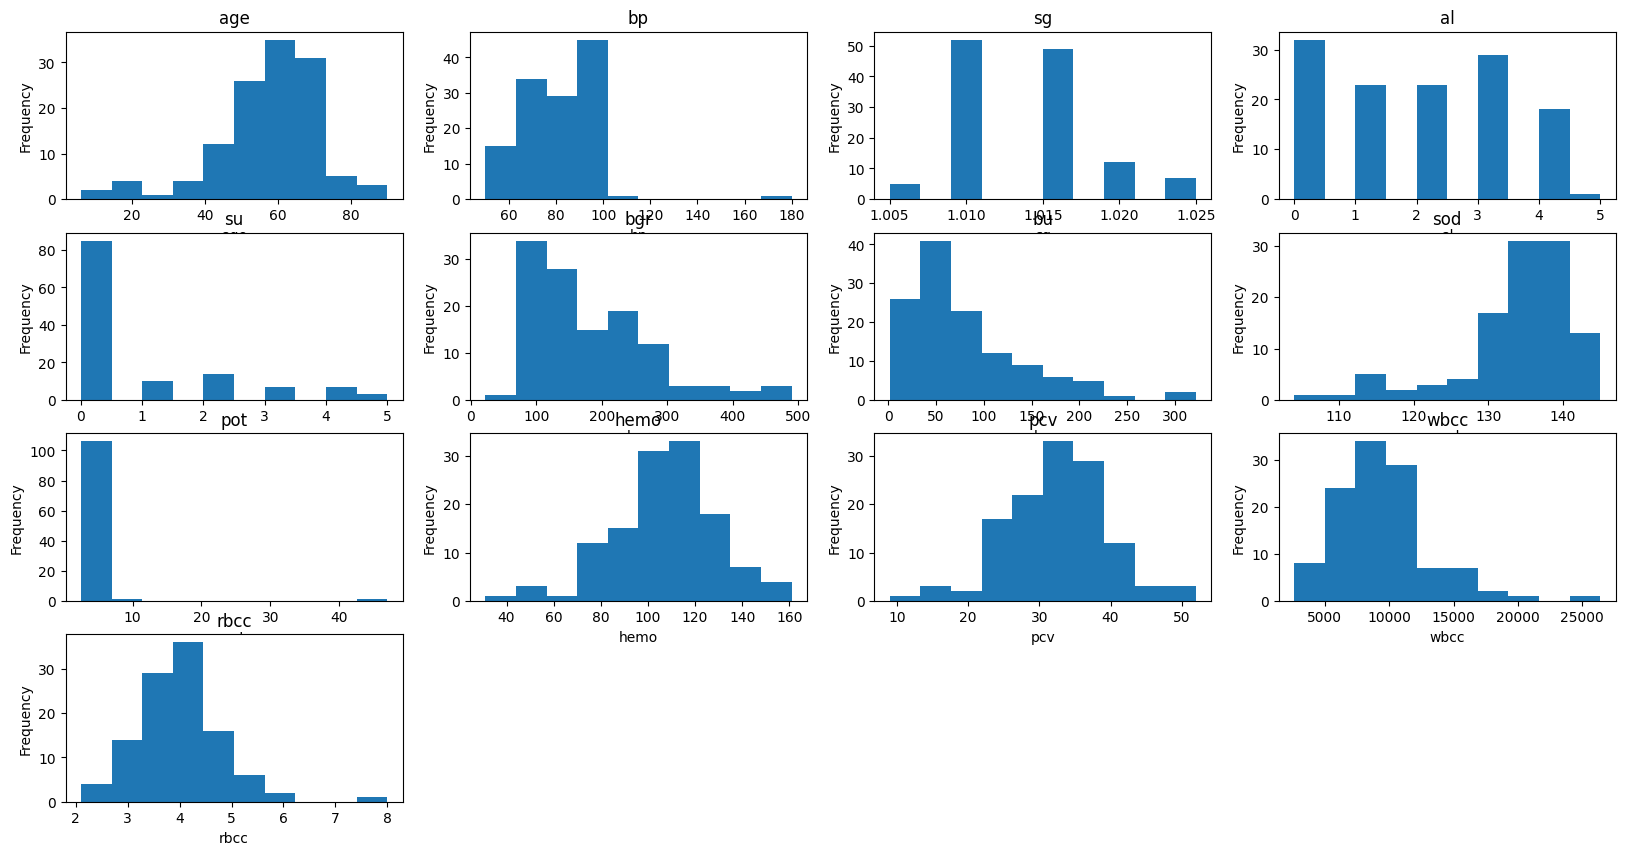

In [58]:
plot_data(df_affected)

In [59]:
#df_affected.pcv.unique()
#df_affected[['pot', 'age']]
#df_affected.info()
df_affected.describe(include='all')

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000,126
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,106.432000,32.440000,9450.442478,3.976852,NaN
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,21.896507,7.150908,3720.458015,0.844510,NaN
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000,NaN
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,95.000000,29.000000,7100.000000,3.400000,NaN
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,108.000000,33.000000,9200.000000,3.900000,NaN
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,120.000000,37.000000,11000.000000,4.400000,NaN



Blood pressure has an anomolous entry for a record of 180  
Blood Glucose Random has a anomolous entry record for 22. Also a strange stretch of same values past 300.  
Blood Urea has an anomolous entry for 300  
Potassium has an outlier entry of 47 that completely skews the entire graph  
Hemoglobin, Packed Cell Volume, White Blood Cell Count and Red Blood Cell Count all have simple extreme outlier.  

In [60]:
df_affected = df_affected[(df_affected['pot']) < 30]
df_affected = df_affected[(df_affected['bp']) < 130]
df_affected = df_affected[(df_affected['bgr']) > 25]
df_affected = df_affected[(df_affected['bu']) < 290]

df_affected['hemo'] = df_affected['hemo'].apply(lambda x: x if 60 < x < 160 else None)
df_affected['wbcc'] = df_affected['wbcc'].apply(lambda x: x if x < 25000 else None)
df_affected['rbcc'] = df_affected['rbcc'].apply(lambda x: x if x < 7 else None)

# Plotting graphs for cleaned up data

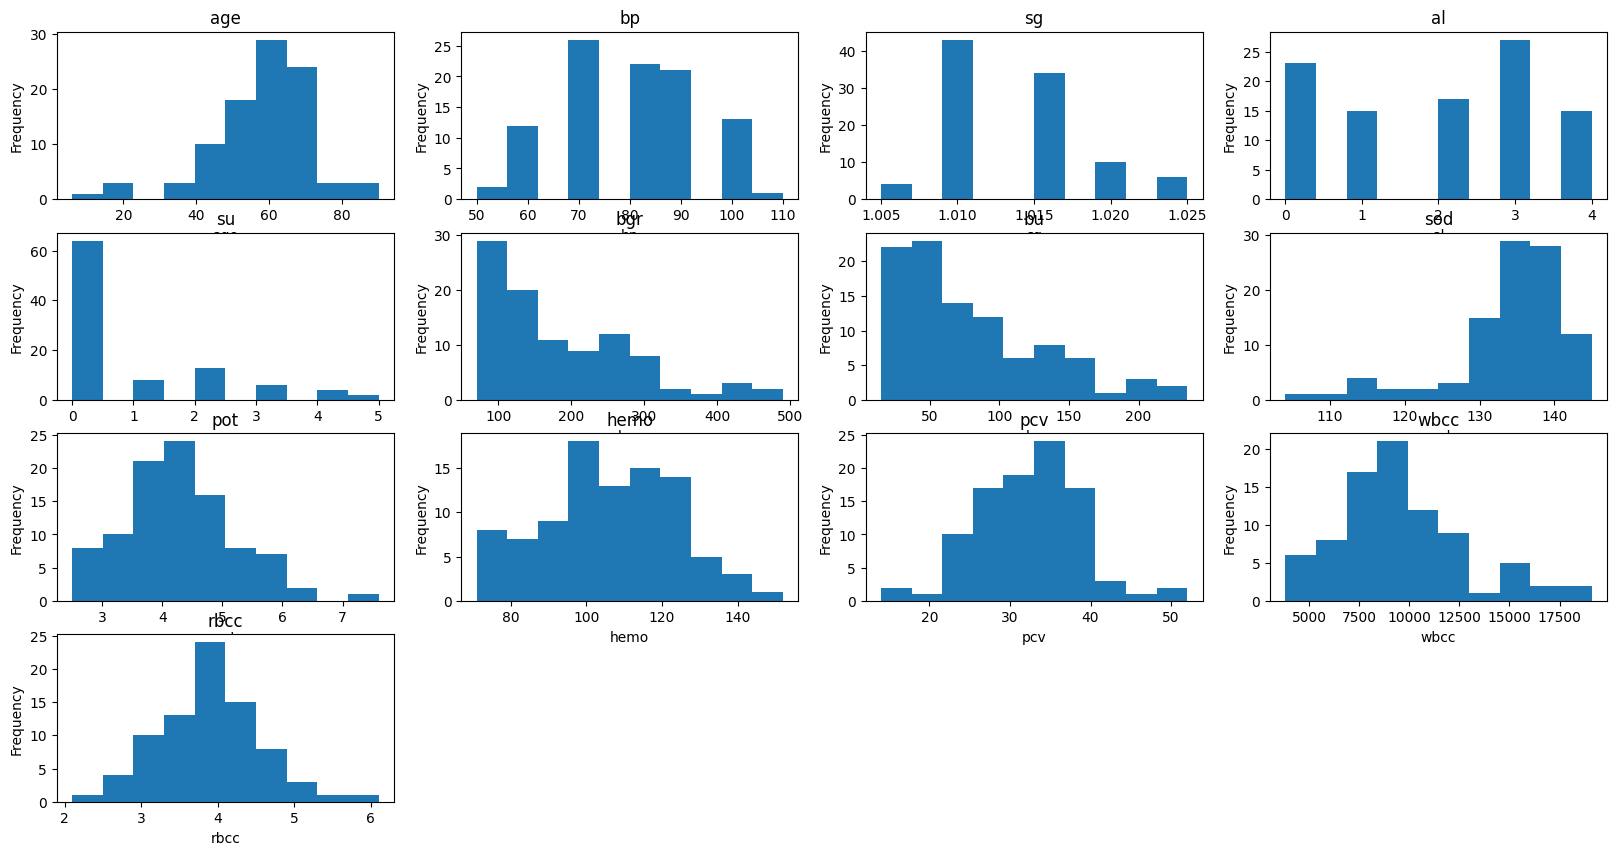

In [61]:
plot_data(df_affected)

# Plotting initial graphs for the control dataset

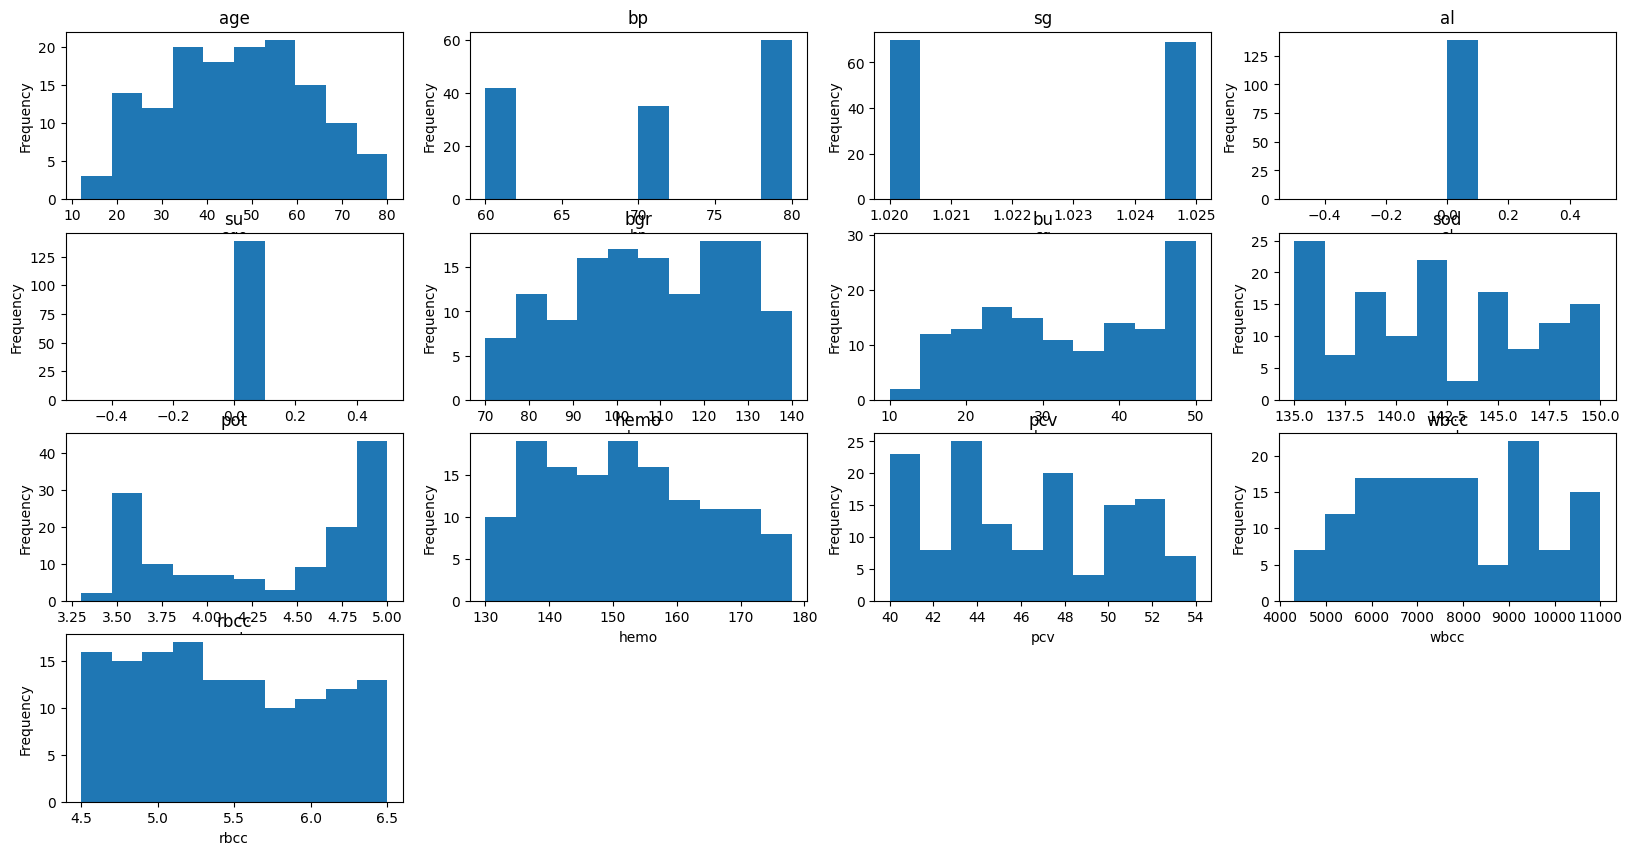

In [62]:
plot_data(df_control)

In [63]:
df_control.describe(include='all')
#df_control.wbcc.unique()
#df_control['al']

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000,139
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,151.883212,46.246377,7708.088235,5.380882,NaN
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,12.845270,4.107695,1815.164727,0.592986,NaN
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000,NaN
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000,NaN
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000,NaN
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,162.000000,50.000000,9225.000000,5.900000,NaN


Albumin and sugar levels are anomolously all marked as 0. You could apply an average value to all instances in both if the data is vitally important. That will however distort conclusions that can be drawn from the data. With that in mind the data should be simply discarded or considered unmeasured in any conclusions.  

Otherwise the data looks good enough and needs no cleaning. 


# Correlation for affected dataset

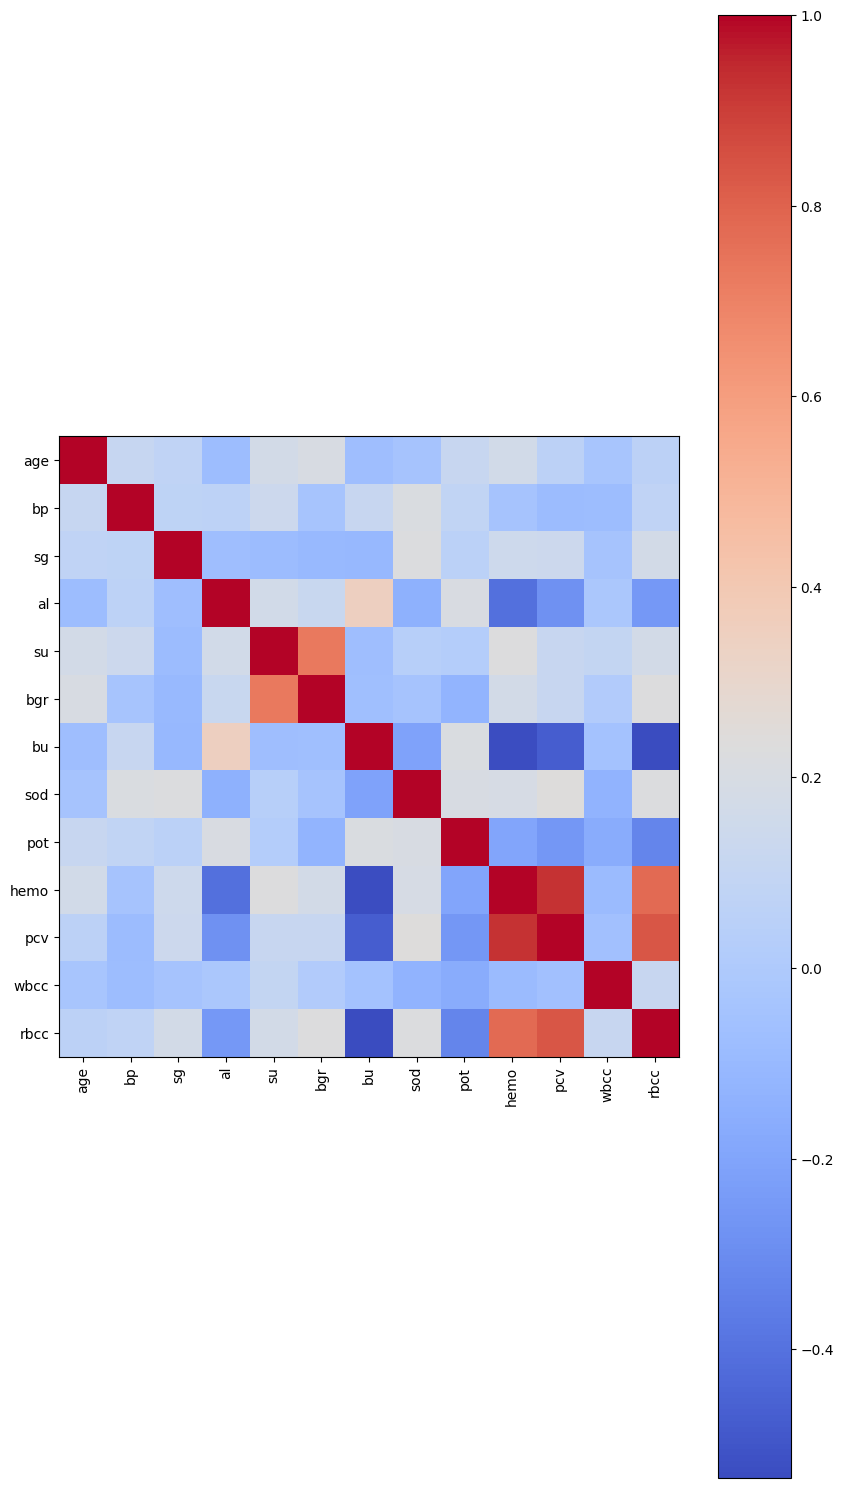

In [64]:
corr = df_affected.drop(columns=['class']).corr()

plt.figure(figsize=(10, 19))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

Hemoglobin, packed cell volume and red blood cell count all strongly correlate negatively with blood urea. While they display strongest negative correlation, between each other, it is only to a minimum value of -0.4, which should be kept in mind when drawing conclusions. It would however indicate that something is lacking in blood.  

Positive values however reach well above 0.5 in the case of positive correlation which displays that Blood Glucose Random and sugar display an obvious strong positive correlation. They are directly porportionate with each other.  

Same goes for Hemoglobin and Packed Cell Value correlating strongly with Red Blood Cell Count, which are directly porpotionate with each other.   




# Correlation for control dataset

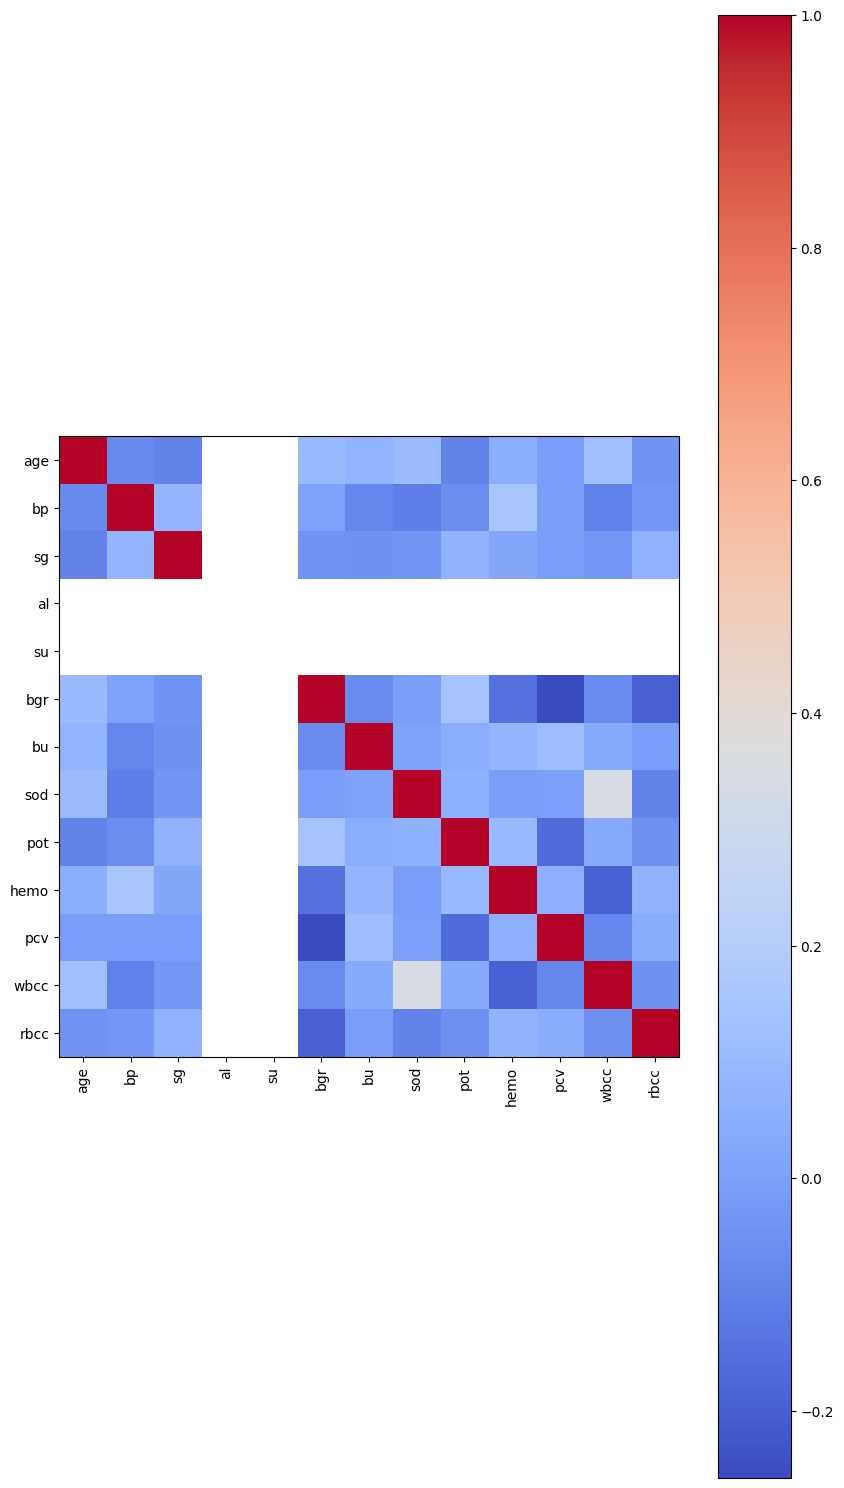

In [65]:
corr = df_control.drop(columns=['class']).corr()

plt.figure(figsize=(10, 19))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

White blood cell count displays negative correlation with hemoglobin, which seems reasonable for control group with nothing wrong  
This is a pretty safe assumption to make, but it should be noted that the minimum negative correlation value is even lower at -0.2.